In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [101]:
df = pd.read_csv("coins_data.csv")

In [102]:
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum


In [103]:
df.describe()

,Volume,MarketCap
count,2.000000e+01,2.000000e+01
mean,3.989441e+09,4.662433e+10
std,8.674327e+09,1.066258e+11
min,1.823284e+06,3.586504e+09
25%,2.192077e+08,5.583104e+09
50%,5.073004e+08,8.201589e+09
75%,1.928351e+09,2.701560e+10
max,3.314948e+10,4.590837e+11


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       20 non-null     object 
 1   Volume       20 non-null     float64
 2   MarketCap    20 non-null     int64  
 3   TotalSupply  20 non-null     object 
 4   ProofType    20 non-null     object 
 5   Network      20 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [105]:
df["TotalSupply"]

0             985,239,504
1           1,000,000,000
2                 163,106
3             431,804,080
4           5,347,888,596
5     589,589,040,239,380
6              84,000,000
7          88,996,805,683
8           1,364,182,225
9          10,000,000,000
10            559,509,636
11        141,339,436,384
12         36,244,287,753
13          2,213,836,281
14         99,988,380,689
15         25,540,319,537
16            153,845,639
17         866,300,000.00
18            120,249,203
19             19,508,418
Name: TotalSupply, dtype: object

To remove zeros after the point (which only occures in line 17), remove commas through numbers, and converting results back into Int:

In [106]:

df["TotalSupply"] = df["TotalSupply"].str.split(".").str.get(0).str.replace(',', '').astype("Int64")

In [141]:
df["TotalSupply"]

0           985239504
1          1000000000
2              163106
3           431804080
4          5347888596
5     589589040239380
6            84000000
7         88996805683
8          1364182225
9         10000000000
10          559509636
11       141339436384
12        36244287753
13         2213836281
14        99988380689
15        25540319537
16          153845639
17          866300000
18          120249203
19           19508418
Name: TotalSupply, dtype: Int64

In [120]:
df.describe()

,Volume,MarketCap,TotalSupply
count,2.000000e+01,2.000000e+01,20.0
mean,3.989441e+09,4.662433e+10,29500214799805.699219
std,8.674327e+09,1.066258e+11,131831236396192.734375
min,1.823284e+06,3.586504e+09,163106.0
25%,2.192077e+08,5.583104e+09,362314469.75
50%,5.073004e+08,8.201589e+09,1182091112.5
75%,1.928351e+09,2.701560e+10,28216311591.0
max,3.314948e+10,4.590837e+11,589589040239380.0


In [121]:
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,985239504,PoS,Ethereum
1,UNI,9.918768e+07,3992451215,1000000000,PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,163106,PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,431804080,PoS,Avalanche
4,DAI,2.177113e+08,5513660644,5347888596,stablecoin,Ethereum


To convert categorical columns into integers:

In [122]:
label_encoder = LabelEncoder()

df_encoded = df.copy()
df_encoded["Symbol"] = label_encoder.fit_transform(df_encoded["Symbol"])
df_encoded["ProofType"] = label_encoder.fit_transform(df_encoded["ProofType"])
df_encoded["Network"] = label_encoder.fit_transform(df_encoded["Network"])

In [123]:
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,985239504,PoS,Ethereum
1,UNI,9.918768e+07,3992451215,1000000000,PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,163106,PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,431804080,PoS,Avalanche
4,DAI,2.177113e+08,5513660644,5347888596,stablecoin,Ethereum


In [124]:
df_encoded.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,9,1.823284e+06,3586504072,985239504,1,5
1,15,9.918768e+07,3992451215,1000000000,1,5
2,18,1.415410e+08,4237575489,163106,2,5
3,1,2.197065e+08,4901630273,431804080,1,0
4,5,2.177113e+08,5513660644,5347888596,4,5


To standardizing columns:

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [126]:
scaled_df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,-0.086711,-0.471646,-0.414120,-0.229578,-0.737309,-0.035158
1,0.953821,-0.460130,-0.410214,-0.229578,-0.737309,-0.035158
2,1.474087,-0.455120,-0.407855,-0.229586,0.081923,-0.035158
3,-1.474087,-0.445875,-0.401465,-0.229582,-0.737309,-1.793065
4,-0.780399,-0.446111,-0.395576,-0.229544,1.720387,-0.035158


Drawing Dendrograms:

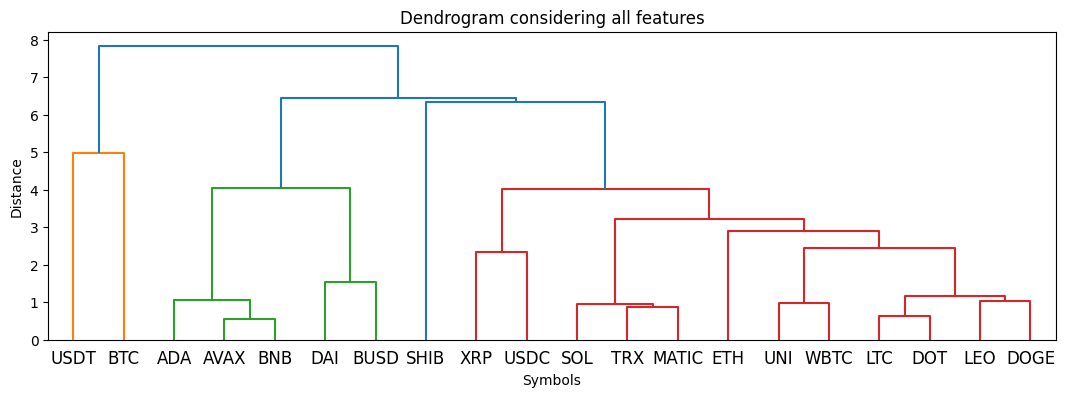

In [140]:
linkage_matrix0 = linkage(scaled_df, method='ward')

plt.figure(figsize=(13, 4))
dendrogram(linkage_matrix0, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram considering all features')
plt.show()


In [128]:
df["Symbol"]

0       LEO
1       UNI
2      WBTC
3      AVAX
4       DAI
5      SHIB
6       LTC
7       TRX
8       DOT
9     MATIC
10      SOL
11     DOGE
12      ADA
13     BUSD
14      XRP
15     USDC
16      BNB
17     USDT
18      ETH
19      BTC
Name: Symbol, dtype: object

# Part 1

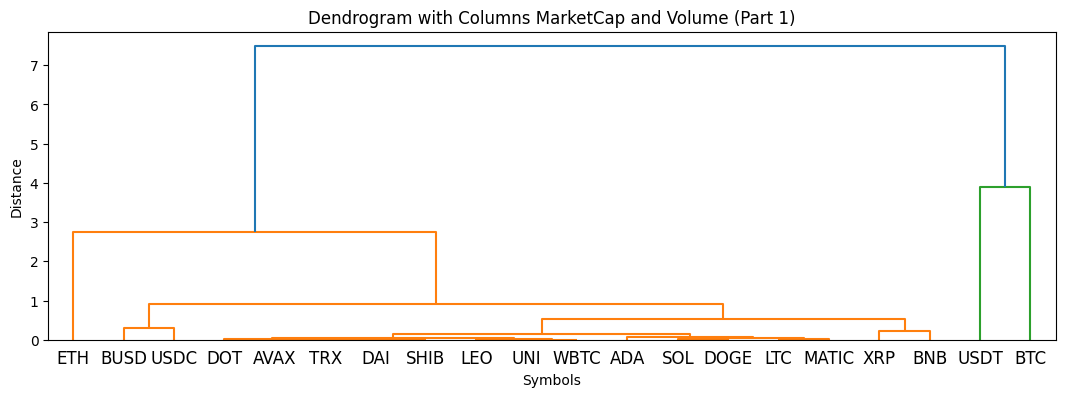

In [139]:
df_part1 = scaled_df[["MarketCap", "Volume"]]

linkage_matrix1 = linkage(df_part1, method='ward') 

plt.figure(figsize=(13, 4))
dendrogram(linkage_matrix1, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram with Columns MarketCap and Volume (Part 1)')
plt.show()


In [130]:
from scipy.cluster.hierarchy import fcluster

threshold = 5
cluster_labels = fcluster(linkage_matrix1, threshold, criterion='distance')
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2],
      dtype=int32)

# Part 2

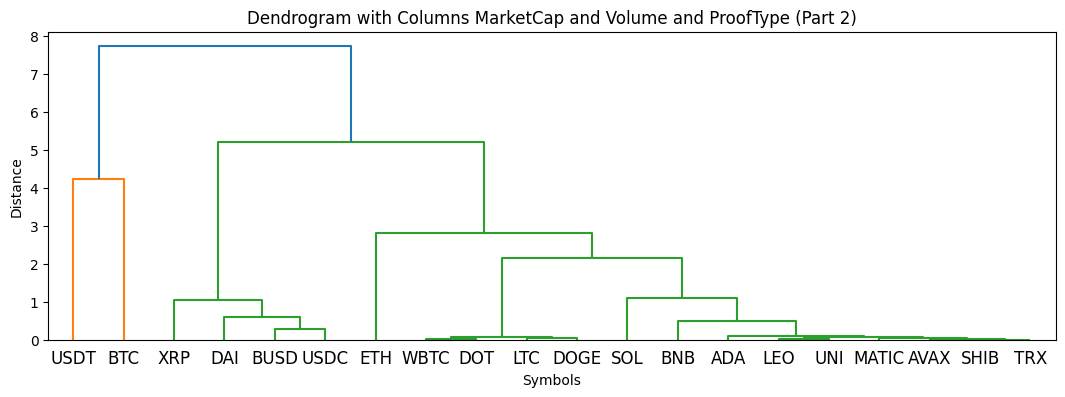

In [138]:
df_part2 = scaled_df[["MarketCap", "Volume", "ProofType"]]

plt.figure(figsize=(13, 4))
linkage_matrix2 = linkage(df_part2, method='ward') 
dendrogram(linkage_matrix2, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram with Columns MarketCap and Volume and ProofType (Part 2)')
plt.show()


In [132]:
from scipy.cluster.hierarchy import fcluster

threshold = 6
cluster_labels = fcluster(linkage_matrix2, threshold, criterion='distance')
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1],
      dtype=int32)

# Part 3

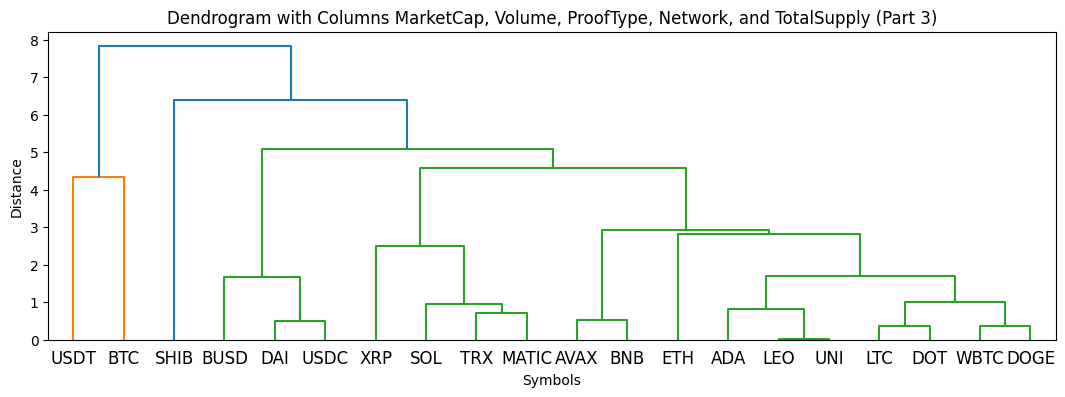

In [137]:
df_part3 = scaled_df[["MarketCap", "Volume", "ProofType", "Network", "TotalSupply"]]

plt.figure(figsize=(13, 4))
linkage_matrix3 = linkage(df_part3, method='ward') 
dendrogram(linkage_matrix3, labels=df["Symbol"].astype(str).values, orientation='top')
plt.xlabel('Symbols')
plt.ylabel('Distance')
plt.title('Dendrogram with Columns MarketCap, Volume, ProofType, Network, and TotalSupply (Part 3)')
plt.show()


In [135]:
threshold = 7
cluster_labels = fcluster(linkage_matrix3, threshold, criterion='distance')
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1],
      dtype=int32)